# Problem set 1: Solved by Oscar Rosman and Sonja Kanerot

# Problem 1

N'(t) = rN(t)(1 - N(t-T)/K)*(N(t)/A - 1)

A = 20, K = 100, r = 0.1, N0 = 50

### Part a)

Show examples of the different dynamics obtained in this model: no os- cillations, damped oscillations, and stable oscillations (limit cycle).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import find_peaks

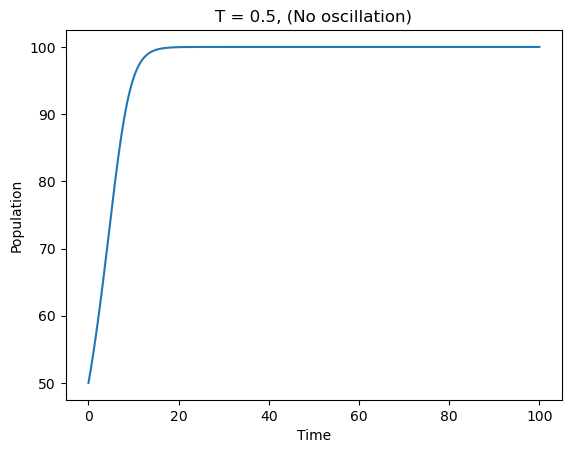

[]


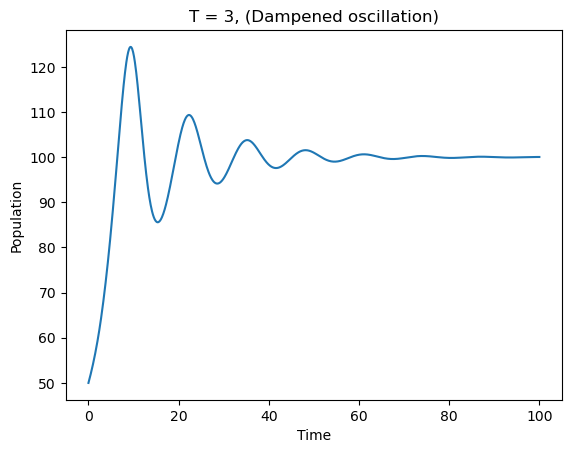

[ 94 223 352 481 611 740 870]


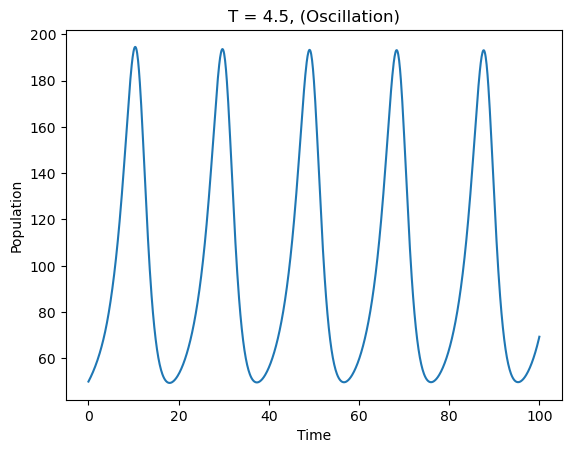

[104 297 490 683 877]


In [2]:
def DynamicalSystem(t, tStep, T, label=None):

    dNdt = lambda n, nDelay:r*n*(1-(nDelay/k))*((n/a)-1)
    nNext = lambda nS, dt, nDot: nS + dt*nDot

    delay = int(T/tStep)
    nSeries = [n0]
    dNSeries = []

    while True:
        if len(nSeries) < delay:
            dN = dNdt(nSeries[-1], n0)
            n = nSeries[-1] + tStep*dN
            nSeries.append(nNext(nSeries[-1], tStep, dN))
        else:
            dN = dNdt(nSeries[-1], nSeries[-delay])
            n = nNext(nSeries[-1], tStep, dN)
            nSeries.append(nNext(nSeries[-1], tStep, dN))
        dNSeries.append(dN)
        
        if len(nSeries) >= len(t):
            break
    if label != None:
        PlotFunction(t, nSeries, label)

    return nSeries,dNSeries

def PlotFunction(t, n, label):
    plt.plot(t, n)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(f'T = {T}, ({label})')
    plt.show()

a = 20
k = 100
r = 0.1
n0 = 50
tStep = 0.1
#tDelay = np.arange(0,5.1,0.1)
t = np.arange(0, 100+tStep, tStep)

tDelay = [0.5, 3, 4.5]
tLabel = ['No oscillation', 'Dampened oscillation', 'Oscillation']


for i, T in enumerate(tDelay):
    N, N_dot = DynamicalSystem(t, tStep, T, tLabel[i])
    peaks, _ = find_peaks(N)
    print(peaks)

### Part b) 

Estimate numerically with one decimal precision the value of T at which the dynamics starts exhibiting damped oscillations.

Solution: The function takes all values of dN/dt for a specific t, if the derivative is ever less than zero (N'<0) then the function is determined to be oscillating. This is found to be at Tdelay = 1.0 using this method.

In [3]:
def IsOscillating(dNdt):
    oscillating = False
    for dN in dNdt:
        if dN < 0:
            oscillating = True
            return oscillating
    return oscillating

tDelay = np.arange(0.1, 5.1, 0.1)

for T in tDelay:
    N, N_dot = DynamicalSystem(t, tStep, T)
    oscillation = IsOscillating(N_dot)

    if oscillation:
        print(f'First oscillation at T = {T:.2f}')
        break



First oscillation at T = 1.00


### Part c)

Find value T at which a hopf bifurcation occurs. (Stable limit cycle => Stable oscillations)

Solution: A hopf bifurcation occurs as the stability of switches from stable to unstable. At the bifurcation there will be stable oscillations and a limit cycle. To solve this the timeseries is calculated for a number of delays. Then a scipy function "find_peaks" identifies the peaks of the series. If the variance between those peaks is below a set threshold the osillations are determined to be stable long term. To eliminate solutions where the oscillations are dampened but with a very small amplitude allowing them to pass the threshold a minimum radius is defined as the amplitude minus the mean of the function. The value of the radius limit is justified by looking at the radius at the last tdelay (T = 1.6) that passes the threshold where the radius is 0.2 but the oscillations are clearly still dampened. At T = 4.5 the amplitude has grown and the radius is now 94

Solution: Th = 4.5 with threshold = 0.3 and radius > 2

In [4]:
def IdentifyLimitCycle(T, n, threshold=0.1, radius=2):
    peaks, _ = find_peaks(n)
    if len(peaks) > 2:
        series = n[peaks[0]:peaks[-1]]
        m = np.mean(series)
    values = [n[i] for i in peaks]

    if len(values) > 2 and np.var(values) < threshold:
        if (values[0] - m) > radius:
            print(f'Stable oscillations found at T = {T}')
            print(f'  > Variance = {np.var(values):.2f}')
            print(f'  > Radius = {np.mean(values) - m:.2f}')
            print(f'  > Mean = {m:.2f}')
            print(f'  > Peaks = {values} ({len(values)})')


tDelay = np.arange(0, 5, 0.1)
threshold = 0.3
radius = 2
for i, T in enumerate(tDelay):
    N, N_dot = DynamicalSystem(t, tStep, T)
    IdentifyLimitCycle(T, N, 0.5, radius)


Stable oscillations found at T = 4.5
  > Variance = 0.30
  > Radius = 94.33
  > Mean = 99.17
  > Peaks = [194.52389008843497, 193.58929151737766, 193.2348657978791, 193.10132194118927, 193.05355144778565] (5)


### Part d)

Determine Th using linear stability analysis around N* = K